In [ ]:
import tensorflow as tf
from tensorflow import keras

### Building dynamic model with keras

Before we start describing hwo we can use keras API to build dynamic models, it is important to differentiate two progamming paradigms:

> 1) Declarative;
> 2) Imperative.

These two types of programming paradigm are typically differentiated using the "what-how" the programming should do approach.

The declarative programming is a paradigm describing what the program should do. For instance, sequential and functional APIs of keras are declarative programming examples. In each of this APIs, a precise static list of commands has been given.

In the example below, we make use of the functional API to give the precise instructions on how the neural network model should be built:

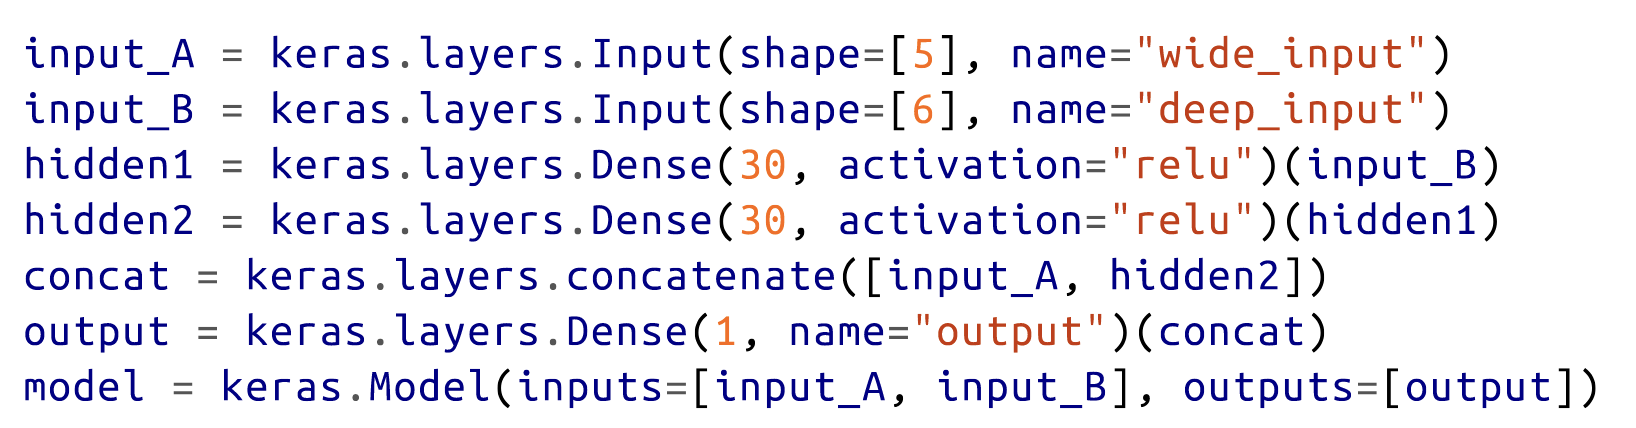

On the other hand, imperative programming is a paradigm describing how the program should do the task. Thus, the imperative programming is not static, enabling more flexibility for the end user. Below we will show an example of how to use the Keras API to build a dynamic model by making use of the imperative programming paradigm.

These two programming paradigms have key roles in how we can build models with Keras. Both sequential and functional API are exmples of the declarative programming paradigm. Some advantages of using it are:

> 1) Model can easily be saved, cloned and shared;
> 2) Its structure can be saved and analysed;
> 3) Easy to debug.

but it has one key disvantage:

> 1) By the end of the day, it is a static model!

Thus, if you need to build more complex and flaxible models, you should use the subclassing API. The subclassing API is an example of coding writen in imperative programming paradigm and thus enable building really flexible models.

The most straight forward way to use the subclassing API is to build customizable model class, which can be used as a wrapper around functional and/or sequential APIs. 

More specifically, below you will find the same neural network model proposed by Cheng et al. (2016) and implemented in the "example4-nonseq-mlp.ipynb" in this repository.

In [4]:
class WideAndDeepModel(keras.Model): 
    def __init__(self, units=30,
                 activation="relu",
                 **kwargs): 
        super().__init__(**kwargs) # handles standard args (e.g., name) 
        self.hidden1 = keras.layers.Dense(units, activation=activation) 
        self.hidden2 = keras.layers.Dense(units, activation=activation) 
        self.main_output = keras.layers.Dense(1) 
        self.aux_output = keras.layers.Dense(1) 
    
    def call(self, inputs): 
        input_A, input_B = inputs 
        hidden1 = self.hidden1(input_B) 
        hidden2 = self.hidden2(hidden1) 
        concat = keras.layers.concatenate([input_A, hidden2]) 
        main_output = self.main_output(concat) 
        aux_output = self.aux_output(hidden2) 
        return main_output, aux_output

In [ ]:
model = WideAndDeepModel()